## Methanol-Synthese, mit Kreislaufführung

### Parameter
$T_{ein}=493,15K$

$p=50 bar$

$\mathcal{R}=0,8$ Rücklaufverhältnis

$\dot Q_{Reaktor} = 0$

$T_{Flash} = 333,15K$

### Bilanzen im Reaktor
Stoffbilanzen (N)

$\dot n_i = \dot n_{i, 0} + \mathcal{R} \dot n_{i, v} + \sum_{j}{\nu_ij \xi_j}$ 

Energiebilanz (1)

$\begin{array}{lll}
0 &= \dot Q & + \sum\limits_i(\dot n_i (\Delta H_i^{\circ}(T)-\Delta H_{i,0}^\circ))_{ein}-
\sum\limits_i(\dot n_i (\Delta H_i^{\circ}(T)-\Delta H_{i,0}^\circ))_{aus} + 
\sum\limits_{j}{\xi_j (-\Delta Hr_j(T))}\\
&= 0 &+ \sum\limits_i((\dot n_{i,0}+\mathcal{R}\cdot\dot n_{i,v}) \cdot(\Delta H_i^{\circ}(T_{ein})-\Delta H_{i,0}^\circ))\\
&&-
\sum\limits_i(\dot n_{i,2}\cdot(\Delta H_i^{\circ}(T_2)-\Delta H_{i,0}^\circ)) \\
&&+\sum\limits_{j}{\xi_j \cdot (-\Delta Hr_j(T))}\\
\end{array}\\
$

Gleichgewichtskonstanten (r)

$\begin{array}{ll}
K_j(T) &= exp \left(-\frac{\Delta H_0^\circ}{R T} + \frac{(\Delta H_0^\circ -\Delta G_0^\circ)}{R T_0} - \frac{1}{T}\int\limits_{T_0}^{T}{\frac{\Delta Cp^\circ}{R}dT} + \int\limits_{T_0}^{T}{\frac{\Delta Cp^\circ}{R}\frac{dT}{T}}\right) \\
&= \prod_i (n_i)^{\nu_i}\left( \frac{p}{p^0}\right)^{\sum_i \nu_i}(n)^{-\sum_i \nu_i}\end{array}$ 

$p^0 = 1 bar$

Idealer Gas-Ansatz, $K_{\phi^{eq}}=1$


### Methoden Zur Berechnung der Gleichgewichtskonstanten $K_j(T)$ und der Verteilungskoeffizienten $K_i(T,x_i)$

* Gleichgewichtskonstanten mit Wechselwirkung der Thermodynamischen Eigenschaften der Komponenten ($H, G, S$) mit der Temperatur
* Verteilungskoeffizienten mit einem kubischen Zustandsgleichung-Ansatz (Peng-Robinson)

**Gleichgewichtskonstanten**

**Methode B)** Wechselwirkung der Reaktionsenthalpie mit der Temperatur [SVNA]

$\begin{array}{ll}
exp \left(- \frac{\Delta G_i}{R T} \right) &= K_p K_{\phi^{eq}} = K_x \prod\limits_{i} \left( \frac{p}{p^0}\right)^{\nu_i}  K_{\phi^{eq}} \\
&=\prod\limits_{i} (n_i)^{\nu_i}\left( \frac{p}{p^0}\right)^{\sum\limits_{i} \nu_i}(n)^{-\sum\limits_{i} \nu_i}   K_{\phi^{eq}}\end{array}$

$\Delta H^\circ = \Delta H_0^\circ + R \int\limits_{T_0}^{T}{\frac{\Delta Cp^\circ}{R}dT}$

$\Delta S^\circ = \Delta S_0^\circ + R \int\limits_{T_0}^{T}{\frac{\Delta Cp^\circ}{R}\frac{dT}{T}}$

$\Delta G^\circ = \Delta H^\circ - T \Delta S^\circ = \Delta H_0^\circ + R \int\limits_{T_0}^{T}{\frac{\Delta Cp^\circ}{R}dT} - T \Delta S_0^\circ - R T \int\limits_{T_0}^{T}{\frac{\Delta Cp^\circ}{R}\frac{dT}{T}}$

$\Delta S_0^\circ = \frac{\Delta H_0^\circ - \Delta G_0^\circ}{T_0}$

$\Delta G^\circ = \Delta H_0^\circ - \frac{T}{T_0}(\Delta H_0^\circ -\Delta G_0^\circ) + R \int\limits_{T_0}^{T}{\frac{\Delta Cp^\circ}{R}dT} - R T \int\limits_{T_0}^{T}{\frac{\Delta Cp^\circ}{R}\frac{dT}{T}}$

$\begin{array}{ll}
K_{(T)} &= exp \left(-\frac{\Delta H_0^\circ}{R T} + \frac{(\Delta H_0^\circ -\Delta G_0^\circ)}{R T_0} - \frac{1}{T}\int\limits_{T_0}^{T}{\frac{\Delta Cp^\circ}{R}dT} + \int\limits_{T_0}^{T}{\frac{\Delta Cp^\circ}{R}\frac{dT}{T}}\right) \\
&= \prod_i (n_i)^{\nu_i}\left( \frac{p}{p^0}\right)^{\sum_i \nu_i}(n)^{-\sum_i \nu_i}\end{array}$ 

Somit läßt sich K(T) bestimmen, insofern man über einen Ausdruck für $Cp_i(T)$ verfügt. Bei geringer Veränderung der Wärmekapazität Cp im Temperatur-Bereich kann man auch einen bestimmten Mittelwert als ~konstant einsetzen.

**Verteilungskoeffizienten**

Phasen-unabhängige Terme

$\begin{array}{|c|c|}
\hline
a_i(T) = \Psi{{ \alpha(Tr_i, \omega_i)  R^2 Tc_i^2}\over{Pc_i}}& b_i =\Omega{{R Tc_i}\over{Pc_i}}\\
\hline
\beta_i = {{b_i P}\over{R T}}& q_i = {{a_i(T)}\over{b_i R T}} \\
\hline
\end{array}$

Phasen-abhängige Mischregeln (L, V)

$\begin{array}{|c|c|}
\hline
a = \sum\limits_i\sum\limits_j x_i x_j a_{ij}  & 
b=\sum\limits_i x_i b_i\\
a_{ij} = (a_i a_j)^{1/2} & \\
\hline
\beta^p \equiv {{b^p P}\over{R T}} \hspace{10mm} \textit{p: (L, V)} 
& q^p = {{a^p}\over{b^p R T}} \hspace{10mm} \textit{p: (L, V)} \\
\hline
\end{array}$

Partielle molare Größen

$\begin{array}{|ccll|}
\hline
\bar{a_i} &\equiv\left[{{\partial (n a)}\over{\partial n_i}} \right]_{T,n_j} 
& =\left[{{\partial }\over{\partial n_i}}({1\over n} \sum\limits_i\sum\limits_j x_i x_j a_{ij}) \right]_{T,n_j} &=-a + 2\sum\limits_i x_j a_{ij} + 2 x_i a_i\\
\bar{b_i} &\equiv\left[{{\partial (n b)}\over{\partial n_i}} \right]_{T,n_j} 
&= \left[{{\partial (n_i b_i)}\over{\partial n_i}} \right]_{T,n_j} + \sum\limits_i\left[{{\partial (n_i b_i)}\over{\partial n_i}} \right]_{T,n_j} &=b_i \\
\bar{q_i} &\equiv \left[{{\partial (n q)}\over{\partial n_i}} \right]_{T,n_j} &= q \left(1+{{\bar{a_i}}\over{a}}-{{\bar{b_i}}\over{b}}\right) &= q \left(1+{{\bar{a_i}}\over{a}}-{{b_i}\over{b}}\right)\\
\hline
\end{array}$

### Literaturhinweise
* [SVNA] Smith J.M., Van Ness H.C., Abbott M.M.; Introduction to chemical engineering thermodynamics; 6th ed.; McGraw-Hill; New York; 2001; S. 458-462.
* [BP] Barin Isan, Platzki Gregor; Thermochemical data of pure substances; 3. ed.; VCH; New York; 1995.

In [1]:
from scipy import optimize
import numpy as np

p = 50. # bar
temp = 273.15 + 220. # K
t_flash = 273.16 + 60 # K
t0_ref = 298.15 # K
r = 8.314 # J/(mol K)
rvg = 0.8 # Rückvermischungsgrad

namen = ['CO', 'H2', 'CO2', 'H2O', 'CH3OH', 'N2']

n0co = 750. # kmol/h
n0h2 = 5625. # kmol/h
n0co2 = 750. # kmol/h
n0h2o = 375. # kmol/h
n0ch3oh = 0. # kmol/h
n0n2 = 500. # kmol/h

ne = np.array([n0co, n0h2, n0co2, n0h2o, n0ch3oh, n0n2])

nuij = np.array([[-1, -2, 0, 0, +1, 0] ,
                 [0, -3, -1, +1, +1, 0], 
                 [-1, +1, +1, -1, 0, 0]]).T

h_298 = np.array(
    [-110.541, 0., -393.505, -241.826,-201.167, 0.]) * 1000 # J/mol

g_298 = np.array(
    [-169.474, -38.962, -457.240, -298.164, -272.667, -57.128]) * 1000 # J/mol

# Berechne delta Cp(T) mit Temperaturfunktionen für ideale Gase (SVN).

# Koeffizienten für Cp(T)/R = A + B*T + C*T^2 + D*T^-2, T[=]K
# Nach rechts hin: A, B, C, D
# Nach unten hin: CO, H2, CO2, H2O, CH3OH, N2
cp_coefs =  np.array([
    [
        y.replace(',', '.') for y in x.split('\t')
    ] for x in """
3,3760E+00	5,5700E-04	0,0000E+00	-3,1000E+03
3,2490E+00	4,2200E-04	0,0000E+00	8,3000E+03
5,4570E+00	1,0450E-03	0,0000E+00	-1,1570E+05
3,4700E+00	1,4500E-03	0,0000E+00	1,2100E+04
2,2110E+00	1,2216E-02	-3,4500E-06	0,0000E+00
3,2800E+00	5,9300e-04	0,0000E+00	4,0000e+03
""".split('\n') if len(x)>0], dtype=float)

def cp(t):
    return r * (
        cp_coefs[:,0] + 
        cp_coefs[:,1] * t + 
        cp_coefs[:,2] * t**2 + 
        cp_coefs[:,3] * t**-2
    ) # J/(mol K)

# Berechne H(T), G(T) und K(T) mit Cp(T)

def h(t):
    return (
        h_298 + 
        r * cp_coefs[:,0]*(t-t0_ref) + 
        r * cp_coefs[:,1]/2.*(t**2-t0_ref**2) + 
        r * cp_coefs[:,2]/3.*(t**3-t0_ref**3) -
        r * cp_coefs[:,3]*(1/t-1/t0_ref)
    ) # J/mol

def g(t, h_t):
    return (
        h_t - t/t0_ref*(h_298 - g_298) -
        r * cp_coefs[:,0]*t*np.log(t/t0_ref) -
        r * cp_coefs[:,1]*t**2*(1-t0_ref/t) - 
        r * cp_coefs[:,2]/2.*t**3*(1-(t0_ref/t)**2) +
        r * cp_coefs[:,3]/2.*1/t*(1-(t/t0_ref)**2)
    ) # J/mol

def k(t, g_t):
    delta_g_t = nuij.T.dot(g_t)
    return np.exp(-delta_g_t/(r * t))


delta_gr_298 = nuij.T.dot(g_298)

delta_hr_298 = nuij.T.dot(h_298)

cp_493 = cp(493.15) # J/(mol K)
h_493 = h(493.15) # J/mol
g_493 = g(493.15, h_493) # J/mol
k_493 = k(493.15, g_493) # []

for i, f in enumerate(delta_hr_298):
    print('Delta H_' + str(i+1) + '(298.15K)=' + str(f/1000.) + 'kJ/mol')

print('\n')
for i, f in enumerate(k_493):
    print('K' + str(i+1) + '(493K)=' + str(f))
print('\n')

n0 = np.array([n0co, n0h2, n0ch3oh])
    
def fun(x_vec):    
    nco = x_vec[0]
    nh2 = x_vec[1]
    nch3oh = x_vec[2]
    xi1 = x_vec[3]
    t = x_vec[4]
    
    n = np.array([nco, nh2, nch3oh])
    
    cp_t = cp(t)
    h_t = h(t)
    g_t = g(t, h_t)
    k_t = k(t, g_t)
    
    h_ein = h_t[[1, 2, -2]]
    cp_ein = cp_t[[1, 2, -2]]
    cp_t = cp_t[[1, 2, -2]]
    h_t = h_t[[1, 2, -2]]
    g_t = g_t[[1, 2, -2]]
    
    delta_h_t = nuij[[1, 2, -2]].T.dot(h_t) # J/mol
    
    f1 = -nco + n0co - xi1
    f2 = -nh2  + n0h2 -2*xi1
    f3 = -nch3oh + n0ch3oh +xi1
    f4 = -k_t[0] * (nco * nh2**2) + \
            nch3oh * (p/1.)**-2 * (nco + nh2 + nch3oh)**-(-2)
    f5 = np.sum(
        np.multiply(n0, cp_ein)*temp - 
        np.multiply(n, cp_t)*t 
    ) + xi1 * (-delta_h_t[0])
    
    return [f1, f2, f3, f4, f5]

x0 = np.append(n0, [0., temp])

sol = optimize.root(fun, x0)
f_final = - sol.x[:3].reshape([3,1]) + ne[[0,1,4]].reshape([3,1]) + nuij[:,0][[0,1,4]].reshape([3,1])*sol.x[-2]

print(sol)
print('\n\n')
print('Zustand der Optimisierungs-Funktionen\n')
print(f_final)

print('\n\n')
print('T_ein=493.15K, p=50 bar, in adiabatischem Reaktor')
print('Lösung für nur einzige Reaktion (ohne CO2):\n')
for i, f in enumerate(sol.x[:2]):
    print('n_' + namen[i] + '= ' + str(f) + ' kmol/h')
print('n_' + namen[4] + '= ' + str(sol.x[2]) + ' kmol/h')
print('T= ' + str(sol.x[-1]) + ' K')

n0 = np.array([n0co, n0h2, n0co2, n0h2o, sol.x[2], n0n2])
#n0 = ne

# Lösung des einfacheren Falls in schwierigerem Fall einwenden.
def fun(x_vec):    
    nco = x_vec[0]
    nh2 = x_vec[1]
    nco2 = x_vec[2]
    nh2o = x_vec[3]
    nch3oh = x_vec[4]
    nn2 = x_vec[5]
    xi1 = x_vec[6]
    xi2 = x_vec[7]
    xi3 = x_vec[8]
    t = x_vec[9]
    
    n = np.array([nco, nh2, nco2, nh2o, nch3oh, nn2])
    xi = np.array([xi1, xi2, xi3])
    
    h_ein = h_493
    cp_ein = cp_493
    cp_t = cp(t)
    h_t = h(t)
    g_t = g(t, h_t)
    k_t = k(t, g_t)
    
    delta_h_t = nuij.T.dot(h_t) # J/mol
    
    f1 = -nco + n0co - xi1 +0 -xi3
    f2 = -nh2  + n0h2 -2*xi1 -3*xi2 +xi3
    f3 = -nco2 + n0co2 +0 -xi2 +xi3
    f4 = -nh2o + n0h2o +0 +xi2 -xi3
    f5 = -nch3oh + n0ch3oh +xi1 +xi2 -0
    f6 = -nn2 + n0n2 + 0
    f7 = -k_t[0] * (nco * nh2**2) + \
        nch3oh * (p/1.)**-2 * (nco + nh2 + nco2 + nh2o + nch3oh + nn2)**-(-2)
    f8 = -k_t[1] * (nco2 * nh2**3) + \
        nch3oh * nh2o * (p/1.)**-2 * (nco + nh2 + nco2 + nh2o + nch3oh + nn2)**-(-2)
    f9 = -k_t[2] * (nco * nh2o) + \
        nco2 * nh2 * (p/1.)**0 * (nco + nh2 + nco2 + nh2o + nch3oh + nn2)**-0
    f10 = np.sum(
        np.multiply(n0, (h_ein-h_298)) - 
        np.multiply(n, (h_t-h_298))) + np.dot(xi, -delta_h_t)
    
    return [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10]

x0 = np.append(n0, [0., 0., 0., sol.x[-1]])

sol = optimize.root(fun, x0)

print('\n\n')
print('success: ' + str(sol.success))

f_final = - sol.x[:6].reshape([6,1]) + ne.reshape([6,1]) + nuij.dot(sol.x[6:-1].reshape([3,1]))

print('\n\n')
print('T_ein=493.15K, p=50 bar, in adiabatischem Reaktor.')
print('Lösung für alle drei Reaktionen, mit CO2:\n')
for i, f in enumerate(sol.x[:6]):
    print('n_' + namen[i] + '= ' + str(f) + ' kmol/h')

print('\n')

for i, f in enumerate(sol.x[6:-1]):
    print('xi_' + str(i) + '= ' + str(f) + ' kmol/h')
    
print('\n')
    
print('T=' + str(sol.x[-1]) + ' K, oder...')
print('T=' + str(sol.x[-1]-273.15) + ' °C')

print('\n')
print('0 = Q + Sum(Delta H)_ein - Sum(Delta H)_aus')
bilanz = np.sum(
    np.multiply(n0, (h_493-h_298)) -
    np.multiply(sol.x[:6], (h(sol.x[-1])-h_298))
) + np.dot(sol.x[6:-1], -nuij.T.dot(h(sol.x[-1]))) 
annaeherung = np.sum(
    np.multiply(n0, cp_493)*493.15 -
    np.multiply(sol.x[:6], cp(sol.x[-1]))*sol.x[-1]
) + np.dot(sol.x[6:-1], -nuij.T.dot(h(sol.x[-1])))
print('-Q = (n.(H_t-H_298))_ein -(n.(H_t-H_298))_aus  + Sum(xi_j * (-Delta Hr_j)) = ' + 
      str(bilanz) + 'J/h')
print('\n\n')
print('Zustand der Optimisierungs-Funktionen\n')
print(f_final)
print('\n\n')
print('Umsatz(CO): ' + '{:.4g}'.format((ne[0]-sol.x[0])/ne[0]))
print('Umsatz(CO2): ' + '{:.4g}'.format((ne[2]-sol.x[2])/ne[2]))
print('Niedriger Umsatz!')

Delta H_1(298.15K)=-90.626kJ/mol
Delta H_2(298.15K)=-49.488kJ/mol
Delta H_3(298.15K)=-41.138kJ/mol


K1(493K)=0.0088102868389
K2(493K)=5.7133657404e-05
K3(493K)=154.204845956


    fjac: array([[ -3.71428495e-06,   5.80563614e-18,  -9.74551128e-21,
         -9.98588456e-01,  -5.31139871e-02],
       [  1.47283115e-05,  -5.36610087e-05,   1.68368925e-20,
          5.31139870e-02,  -9.98588454e-01],
       [ -2.54456735e-01,   8.29823294e-01,  -4.96633737e-01,
          3.50796795e-06,  -4.81585289e-05],
       [ -1.73310184e-01,  -5.44352279e-01,  -8.20758293e-01,
         -7.73093978e-07,   2.66544879e-05],
       [  9.51428058e-01,   1.22775792e-01,  -2.82330932e-01,
         -3.92323978e-06,   7.22647756e-06]])
     fun: array([  2.84217094e-14,  -3.97903932e-13,   0.00000000e+00,
         2.44026606e-02,  -2.37509608e-04])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([  2.12454058e-01,  -1.32989716e-02,  -8.42828449e-07,
         2.17761423e-07,   8.49526289e-07]

In [19]:
print('Lösung, in 30 Dezimalzahlen')
print('')
for part in sol.x:
    print('{:.30g}'.format(part).replace('.',','))

Lösung, in 30 Dezimalzahlen

487,718493000310843399347504601
5439,09767882257983728777617216
862,886897607255377806723117828
262,113102393001156542595708743
149,394609392209389397976337932
500
-2215513,20429081656038761138916
2215662,59890020918101072311401
2215775,48579781642183661460876
579,830273084205259692680556327


### Verbesserung des Umsatzes mit Rückvermischung

In [21]:
import z_l_v
z_l_v.use_pr_eos()

r=8.314 * 10.**6/10.**5 # bar cm^3/(mol K)
rvg = 0.8 # Rückvermischungsgrad
t_flash = 273.16 + 60 # K
p = 50. # bar

# Kritische Parameter Tc, Pc, omega(azentrischer Faktor)
tc = np.array([
    132.86, 33.19, 304.13, 647.10, 513.38, 126.19
]) # K

pc = np.array([
    34.98, 13.15, 73.77, 220.64, 82.16, 33.96
]) # bar

omega_af = np.array(
    [0.050, -0.219, 0.224, 0.344, 0.563, 0.037]
)

# Parameter der Wagner-Gleichung
w_coeffs = """
– 6,19574 1,32502 – 0,95226 – 1,98513
– 4,83622 0,94200 0,76650 – 0,47071
– 7,02916 1,53937 – 2,28330 – 2,34853
– 7,86975 1,90561 – 2,30891 – 2,06472
– 8,72963 1,45860 – 2,78449 – 0,70669
– 6,12498 1,26499 – 0,76765 – 1,78173
"""

w_coeffs = np.array(
    [
        x.split(' ') for x in 
        w_coeffs.replace(
            '– ', '-'
        ).replace(
            ',', '.'
        ).split('\n') if len(x)>0
    ], dtype=float
)

sol.x[4] = 149.394609392209389397976337932
sol.x[-1] = 579.830273084205259692680556327
n0 = np.array([n0co, n0h2, n0co2, n0h2o, sol.x[2], n0n2])
#n0 = ne

# Lösung des einfacheren Falls in schwierigerem Fall einwenden.
def fun(x_vec):    
    n2co = x_vec[0]
    n2h2 = x_vec[1]
    n2co2 = x_vec[2]
    n2h2o = x_vec[3]
    n2ch3oh = x_vec[4]
    n2n2 = x_vec[5]
    xi1 = x_vec[6]
    xi2 = x_vec[7]
    xi3 = x_vec[8]
    t2 = x_vec[9]
    
    # Stoffströme am Ausgang des Reaktors
    n2 = np.array([n2co, n2h2, n2co2, n2h2o, n2ch3oh, n2n2])
    # Stoffströme am Austritt des Systems (Gas)
    # n = np.array([nco, nh2, nco2, nh2o, nch3oh, nn2])
    # Stoffströme am Austritt des Systems (Flüssigkeit)
    # nl = n0 - n
    # Stoffströme im Rücklaufstrom
    # nr = rvg * n
    # Reaktionslaufzahlen
    xi = np.array([xi1, xi2, xi3])
    
    h_0 = h_493
    cp_0 = cp_493
    cp_t2 = cp(t2)
    h_t2 = h(t2)
    g_t2 = g(t2, h_t2)
    k_t2 = k(t2, g_t2)
    
    # phi_l, phi_v, k_i. Lösung des isothermischen Verdampfers
    z_i = n2/sum(n2)
    x_i = 1 / len(n2) * np.ones(len(n2))
    y_i = 1 / len(n2) * np.ones(len(n2))
    for i in range(10):
        soln = z_l_v.isot_flash(
            t2, p, x_i, y_i, z_i, tc, pc, omega_af
        )
        y_i = soln['y_i']
        x_i = soln['x_i']
        v_f = soln['v_f']
        k_i_verteilung = soln['k_i']
    
    n = n2 * v_f / (1 + rvg)
    nco = n[0]
    nh2 = n[1]
    nco2 = n[2]
    nh2o = n[3]
    nch3oh = n[4]
    nn2 = n[5]    
    
    delta_h_t2 = nuij.T.dot(h_t2) # J/mol
    
    f1 = -n2co + rvg*nco + n0co - xi1 +0 -xi3
    f2 = -n2h2  + rvg*nh2 + n0h2 -2*xi1 -3*xi2 +xi3
    f3 = -n2co2 + rvg*nco2 + n0co2 +0 -xi2 +xi3
    f4 = -n2h2o + rvg*nh2o + n0h2o +0 +xi2 -xi3
    f5 = -n2ch3oh + rvg*nch3oh + n0ch3oh +xi1 +xi2 -0
    f6 = -n2n2 + rvg*nn2 + n0n2 + 0
    f7 = -k_t2[0] * (n2co * n2h2**2) + \
        n2ch3oh * (p/1.)**-2 * (n2)**-(-2)
    f8 = -k_t2[1] * (n2co2 * n2h2**3) + \
        n2ch3oh * n2h2o * (p/1.)**-2 * (n2)**-(-2)
    f9 = -k_t2[2] * (n2co * n2h2o) + \
        n2co2 * n2h2 * (p/1.)**0 * (n2)**-0
    f10 = np.sum(
        np.multiply(n0, (h_0-h_298)) - 
        np.multiply(n, (h_t2-h_298))) + np.dot(xi, -delta_h_t2)
    
    return [
        f1, f2, f3, f4, f5, f6, f7, f8, f9, f10]

x0 = np.append(n0, [0., 0., 0., sol.x[-1]])

sol = optimize.root(fun, x0)

print(sol)

C:\Users\ssv\git\walas\z_l_v.py:219: RuntimeWarning: invalid value encountered in log
  np.log((z_l + sigma * beta_l) / (z_l + epsilon * beta_l))
C:\Users\ssv\git\walas\z_l_v.py:221: RuntimeWarning: invalid value encountered in log
  beta_l) - q_mp_i_l * i_int_l


ValueError: setting an array element with a sequence.

{'soln_l': {'a_i': array([  1733165.08160427,  17458284.48372004]), 'b_i': array([ 29.85299791,  80.66652805]), 'b_l': 70.503822025309844, 'a_l': 13002863.974989085, 'q_l': 7.1345679627269725, 'a_mp_i_l': array([ -3508421.43162694,  17130685.32664309]), 'b_mp_i_l': array([ 29.85299791,  80.66652805]), 'q_mp_i_l': array([ 2.188579 ,  8.3710652]), 'beta_l': 0.081822969418703859, 'z_l': array([ 0.12340037]), 'i_int_l': array([ 0.50866473]), 'ln_phi_l': array([ 1.69577236, -2.0808234 ]), 'phi_l': array([ 5.45085435,  0.12482739])}, 'soln_v': {'a_i': array([  1733165.08160427,  17458284.48372004]), 'b_i': array([ 29.85299791,  80.66652805]), 'b_v': 55.259762981082837, 'a_v': 7548230.0509312116, 'q_v': 5.2841779059119176, 'a_mp_i_v': array([  -314329.65012667,  15410789.75198909]), 'b_mp_i_v': array([ 29.85299791,  80.66652805]), 'q_mp_i_v': array([ 2.20945682,  8.358899  ]), 'beta_v': 0.064131528853326639, 'z_v': array([ 0.6200515]), 'i_int_v': array([ 0.09842293]), 'ln_phi_v': array([ 0.16

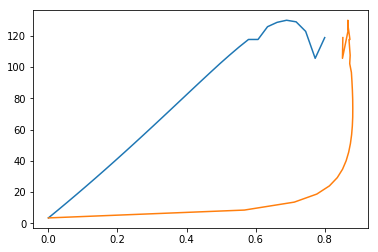

50.0

In [18]:
import importlib
import z_l_v
importlib.reload(z_l_v)
z_l_v.beispiel_svn_14_2()
p

In [20]:
[
    [
        y.replace(',', '.') for y in x.split('\t')
    ] for x in """
3,3760E+00	5,5700E-04	0,0000E+00	-3,1000E+03
3,2490E+00	4,2200E-04	0,0000E+00	8,3000E+03
5,4570E+00	1,0450E-03	0,0000E+00	-1,1570E+05
3,4700E+00	1,4500E-03	0,0000E+00	1,2100E+04
2,2110E+00	1,2216E-02	-3,4500E-06	0,0000E+00
3,2800E+00	5,9300e-04	0,0000E+00	4,0000e+03
""".split('\n') if len(x)>0]

[['3.3760E+00', '5.5700E-04', '0.0000E+00', '-3.1000E+03'],
 ['3.2490E+00', '4.2200E-04', '0.0000E+00', '8.3000E+03'],
 ['5.4570E+00', '1.0450E-03', '0.0000E+00', '-1.1570E+05'],
 ['3.4700E+00', '1.4500E-03', '0.0000E+00', '1.2100E+04'],
 ['2.2110E+00', '1.2216E-02', '-3.4500E-06', '0.0000E+00'],
 ['3.2800E+00', '5.9300e-04', '0.0000E+00', '4.0000e+03']]